# 1. Prepare Problem

## a) Load libraries

In [2]:
from pandas import read_csv
import pandas as pd
from pandas import set_option
set_option('display.width',100)
set_option('display.precision',3)
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier


## b) Load dataset

In [3]:
from sklearn.datasets import load_breast_cancer
cancer_dataset = load_breast_cancer()
print(dir(cancer_dataset))
cancer = pd.DataFrame(data=cancer_dataset.data, columns=cancer_dataset.feature_names)
cancer['target'] = cancer_dataset.target

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


## c) Declare X and y

In [4]:
X = cancer_dataset.data
y = cancer_dataset.target
print(X.shape)
print(y.shape)

(569, 30)
(569,)


# 2. Summarize Data

## a) Descriptive statistics

In [20]:
print(cancer.shape)
print(cancer.head(2))
print(cancer.describe())
print(cancer.groupby('target').size())

(569, 31)
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  mean compactness  \
0        17.99         10.38           122.8     1001.0            0.118             0.278   
1        20.57         17.77           132.9     1326.0            0.085             0.079   

   mean concavity  mean concave points  mean symmetry  mean fractal dimension  ...  worst texture  \
0           0.300                0.147          0.242                   0.079  ...          17.33   
1           0.087                0.070          0.181                   0.057  ...          23.41   

   worst perimeter  worst area  worst smoothness  worst compactness  worst concavity  \
0            184.6      2019.0             0.162              0.666            0.712   
1            158.8      1956.0             0.124              0.187            0.242   

   worst concave points  worst symmetry  worst fractal dimension  target  
0                 0.265           0.460                    0.11

## b) Data visualizations
- **Box Plot** (`iris.drop(columns='target').plot(kind='box', subplots=True, layout=(2,2), sharex=True, sharey=False)`):
  - Helps identify **outliers** in each feature.
  - Displays the **range and spread** of each feature.
  - Provides insight into feature **skewness** if the median is not centered in the box or if the whiskers are uneven.
  - Allows **feature comparison** to understand the relative spread and range of different features.

- **Histogram** (`iris.drop(columns='target').hist()`):
  - Shows the **distribution** of each feature.
  - Helps assess if the feature follows a **normal (Gaussian)** distribution or is **skewed**.
  - Reveals if the feature is **multimodal** (i.e., has multiple peaks).
  - Highlights the need for **scaling or transformation** if features have vastly different ranges or distributions.

- **Scatter Matrix** (`scatter_matrix(iris.drop(columns='target'))`):
  - Visualizes **pairwise relationships** between all features.
  - Helps assess **correlations** between features.
  - Identifies **linear relationships** between features (e.g., petal length and petal width).
  - Displays potential **clusters or groups** of features when colored by species, helping to identify how well features separate the species.
  - Allows for **outlier detection** by identifying points that deviate from expected patterns.

- **Overall Goals**:
  - Identify **outliers** that may skew analysis.
  - Explore **feature relationships** and **correlations**.
  - Check for **distribution shapes** and determine if features require scaling or transformations.
  - Visualize how well the features separate the **species** (target classes).
  - Detect **multimodal distributions** or **skewed features**.


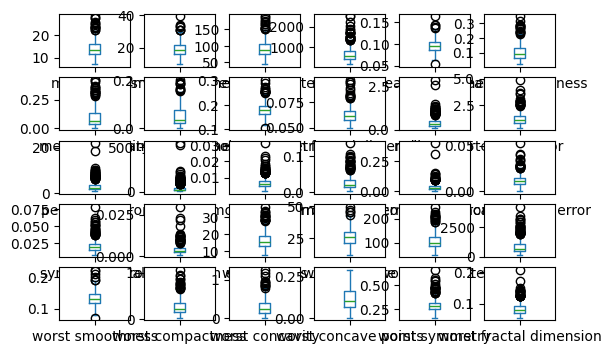

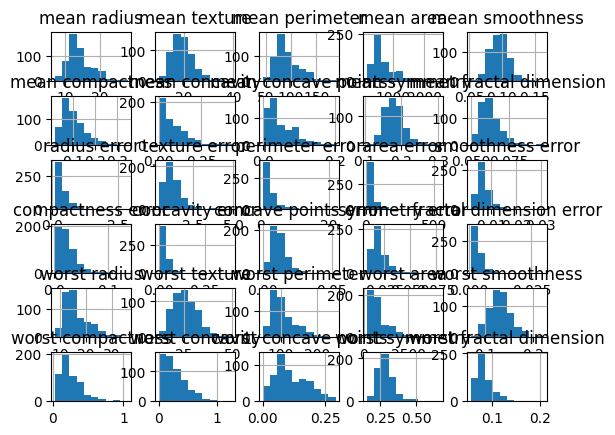

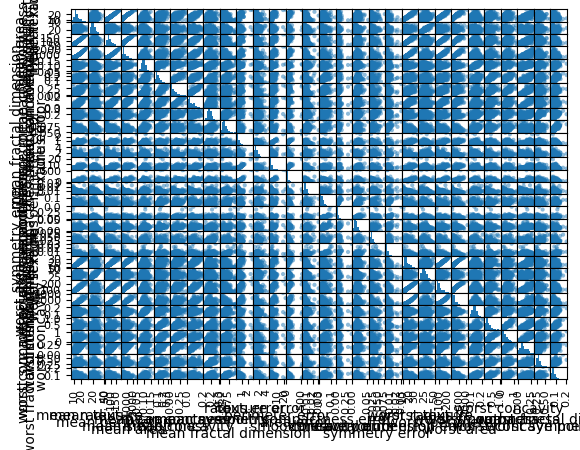

In [22]:
cancer.drop(columns='target').plot(kind='box', subplots=True, layout=(6,6), sharex=True, sharey=False)
cancer.drop(columns='target').hist()
scatter_matrix(cancer.drop(columns='target'))
pyplot.show()

- **Using the Scatterplot Matrix to Choose Between Linear and Non-Linear Models**:

  - **Linear Relationships**:
    - Look for **straight-line patterns** in the scatter plots between feature pairs.
    - If the data points form a **linear trend** (positive or negative slope), a **linear model** might be appropriate.
    - **Linear models** to consider:
      - **Linear regression** (for regression tasks)
      - **Logistic regression** (for classification tasks)
      - **SVM with a linear kernel**
  
  - **Non-Linear Relationships**:
    - Look for **curved patterns**, **clusters**, or **complex shapes** (e.g., U-shape, S-curve, circular distributions).
    - If the relationships between features look **non-linear**, a **non-linear model** might be more suitable.
    - **Non-linear models** to consider:
      - **Decision trees** (capture complex, non-linear relationships)
      - **Random forests** (ensemble of decision trees)
      - **SVM with a non-linear kernel** (e.g., radial basis function)
      - **K-Nearest Neighbors (KNN)** (works well for non-linear decision boundaries)
      - **Neural networks** (especially deep learning models for complex patterns)

  - **Summary**:
    - If the scatter plots reveal **linear relationships**, consider starting with a **linear model**.
    - If the scatter plots show **curved or complex patterns**, explore **non-linear models** for better performance.


In [ ]:
# 3. Prepare Data
# a) Data Cleaning
# b) Feature Selection
# c) Data Transforms

# 4. Evaluate Algorithms

## a) Split-out validation dataset
- I'm using train_test_split to actually create a isolated validation set
- I'll then use cross_validation later to "train" and "test" on 10 different folds in my X_train and y_train variables

In [67]:
X_train, X_validate, y_train, y_validate = train_test_split(X, y, test_size= 0.20, random_state=0)

## b) Test options and evaluation metric

## c) Spot Check Algorithms
- Logistic Regression (LR) - **Linear**
- Linear Discriminant Analysis (LDA) - **Linear**
- k-Nearest Neighbors (KNN) - **Non-Linear**
- Classification and Regression Trees (CART) - **Non-Linear**
- Gaussian Naive Bayes (NB) - **Non-Linear**
- Support Vector Machines (SVM) - **Non-Linear**

In [68]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state=42)))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('MLP', MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, random_state=0)))

In [69]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=0, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.945121 (0.024465)
LDA: 0.951643 (0.032377)
KNN: 0.923043 (0.043975)
CART: 0.918696 (0.040402)
NB: 0.940531 (0.040852)
SVM: 0.903140 (0.045738)
MLP: 0.859565 (0.067964)


## d) Compare Algorithms

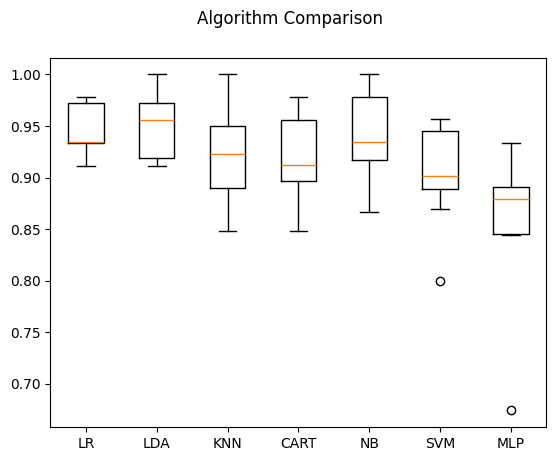

In [70]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# 5. Improve Accuracy
## Pipeline Tuning

In [73]:
pipelines = []
pipelines.append(('LR', Pipeline([('Scaler', StandardScaler()),('LR', LogisticRegression(solver='liblinear'))])))
pipelines.append(('LDA', Pipeline([('Scaler', StandardScaler()),('LDA', LinearDiscriminantAnalysis())])))
pipelines.append(('KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))
pipelines.append(('CART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('NB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())]))) 
pipelines.append(('SVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC(gamma='auto'))])))
pipelines.append(('MLP', Pipeline([('Scaler', StandardScaler()),('MLP', MLPClassifier(hidden_layer_sizes=50, max_iter=5000))])))

In [74]:
results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10, random_state=42, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.980097 (0.020955)
LDA: 0.953720 (0.045864)
KNN: 0.969227 (0.029748)
CART: 0.918599 (0.035850)
NB: 0.938406 (0.040515)
SVM: 0.973575 (0.027642)
MLP: 0.969227 (0.026541)


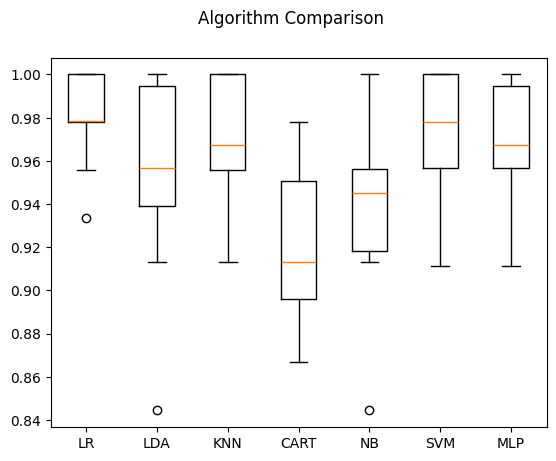

In [77]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Tune scaled KNN

In [78]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

kfold = KFold(n_splits=10, random_state=42, shuffle=True)

model = KNeighborsClassifier()
param_grid = dict(n_neighbors=[1,3,5,7,9,11,13,15,17,19,21])

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)

grid_result = grid.fit(rescaledX, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.969227 using {'n_neighbors': 9}


In [ ]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

## Tune scaled SVM
- Two key parameters can be tuned with SVM
  - The value of C, which is regularization (how much to relax the margin)
    - Default is 1.0
  - The kernal being used
    - Default is Radial Basis Function

In [80]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)

seed = 42
num_folds = 10
scoring = 'accuracy'
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)

In [81]:
model = SVC()
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)

In [82]:
grid

GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7,
                               2.0],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [83]:
grid_result = grid.fit(rescaledX, y_train)

In [84]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.980145 using {'C': 0.1, 'kernel': 'linear'}


In [ ]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

## Tune scaled LR

In [97]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)

kfold = KFold(n_splits=10, random_state=42, shuffle=True)

model = LogisticRegression()

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength (inverse of regularization)
    # 'fit_intercept': [True, False],  # Whether or not to include the intercept in the model
    # 'penalty': ['l1', 'l2'],  # Regularization methods: l1 or l2 penalty
    # 'max_iter': [100, 200, 300]  # Maximum number of iterations for optimization
}
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)

grid_result = grid.fit(rescaledX, y_train)

# Output the best parameters and best score
print("Best parameters found: ", grid_result.best_params_)
print("Best negative mean squared error score: ", grid_result.best_score_)

Best parameters found:  {'C': 1}
Best negative mean squared error score:  0.9800966183574878


# 6. Ensembles

In [99]:
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier(n_estimators=10)))
ensembles.append(('ET', ExtraTreesClassifier(n_estimators=10)))
results = []
names = []

seed = 42
num_folds = 10
scoring = 'accuracy'

for name, model in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

c:\Users\James\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\James\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\James\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\James\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is 

AB: 0.953865 (0.048537)
GBM: 0.949275 (0.041050)
RF: 0.947343 (0.038242)
ET: 0.951498 (0.039496)


# Finalize Model with SVM / LR

In [107]:
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
rescaledValidationX = scaler.transform(X_validate)

model = SVC(C=2, kernel='rbf')
# model = LogisticRegression(C=1)

model.fit(rescaledX, y_train)

SVC(C=2)

In [108]:
predictions = model.predict(rescaledValidationX)

In [109]:
print(accuracy_score(y_validate, predictions))
print(confusion_matrix(y_validate, predictions))
print(classification_report(y_validate, predictions))

0.9824561403508771
[[46  1]
 [ 1 66]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        47
           1       0.99      0.99      0.99        67

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [ ]:

# 6. Finalize Model
# a) Predictions on validation dataset
# b) Create standalone model on entire training dataset
# c) Save model for later use